In [1]:
import pickle
import numpy as np
import pandas as pd
import os

# Data import #

In [2]:
dir = os.getcwd()

In [3]:
with open(dir+"\\..\\data\\outputs\\X.pkl","rb") as f:
    X = pickle.load(f)

with open(dir+"\\..\\data\\outputs\\y.pkl","rb") as f:
    y_series = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\WorkSpace\\MLTF\\ML_final\\notebooks\\data\\y.pkl'

In [ ]:
#X丢弃Date
X = X.drop(['Date'],axis=1)
#y_series变成DataFrame
y = pd.DataFrame(y_series)


In [ ]:
#分割数据集
tarin_percentage, dev_percentage, test_percentage = 0.8, 0.1, 0.1
X_train, X_dev, X_test = X.iloc[:int(len(X)*tarin_percentage)], X.iloc[int(len(X)*tarin_percentage):int(len(X)*(tarin_percentage+dev_percentage))], X.iloc[int(len(X)*(tarin_percentage+dev_percentage)):]
y_train, y_dev, y_test = y.iloc[:int(len(y)*tarin_percentage)], y.iloc[int(len(y)*tarin_percentage):int(len(y)*(tarin_percentage+dev_percentage))], y.iloc[int(len(y)*(tarin_percentage+dev_percentage)):]


In [ ]:
X_train

,neutral,positive,negative,vader_score,comment_num,Open,High,Low,Close,Volume,Close_EWMA3,Close_EWMA7,Close_EWMA14,Close_EWMA30,Close
0,0.702078,0.153399,0.144523,0.103267,867,27.847500,27.860001,26.837500,27.332500,212818400.0,27.332500,27.332500,27.332500,27.332500,26.562500
1,0.722395,0.138788,0.138817,0.146491,1147,27.072500,27.162500,26.352501,26.562500,257142000.0,26.947500,27.140000,27.229833,27.282823,26.565001
2,0.697031,0.187037,0.115931,0.193284,1190,26.635000,26.857500,26.157499,26.565001,263188400.0,26.756251,26.996250,27.141189,27.236512,26.937500
3,0.711032,0.173487,0.115481,0.141675,1094,26.799999,27.049999,26.674999,26.937500,160423600.0,26.846875,26.981563,27.114030,27.217220,27.972500
4,0.682993,0.213791,0.103216,0.168840,1495,27.307501,28.037500,27.174999,27.972500,237458000.0,27.409688,27.229297,27.228493,27.265948,28.002501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.786478,0.131525,0.081997,0.237306,677,43.407501,43.542500,43.115002,43.492500,160677200.0,43.248714,43.028057,42.903808,42.544272,44.105000
743,0.811721,0.121732,0.066547,0.310279,329,43.720001,44.299999,43.715000,44.105000,117684400.0,43.676857,43.297293,43.063967,42.644964,43.634998
744,0.741413,0.150416,0.108170,0.230621,850,43.757500,43.847500,43.522499,43.634998,109745600.0,43.655927,43.381719,43.140104,42.708837,43.587502
745,0.742552,0.128190,0.129258,0.263748,649,43.717499,43.855000,43.312500,43.587502,93902400.0,43.621715,43.433165,43.199757,42.765525,43.752499


In [ ]:
features_finbert = ['Open', 'High', 'Low', 'Close','neutral', 'positive', 'negative', 'Volume', 'Close_EWMA3', 'Close_EWMA7', 'Close_EWMA14', 'Close_EWMA30']
X_finbert_train = X_train[features_finbert]

X_finbert_dev = X_dev[features_finbert]

X_finbert_test = X_test[features_finbert]

In [ ]:
pickle.dump(X_finbert_dev["Open"], open(dir+"\\..\\data\\outputs\\X_finbert_dev.pkl", "wb"))

In [ ]:
from sklearn.preprocessing import StandardScaler



sc_X = StandardScaler()
sc_X.fit(X_finbert_train)
X_finbert_train = sc_X.transform(X_finbert_train)
X_finbert_dev = sc_X.transform(X_finbert_dev)
X_finbert_test = sc_X.transform(X_finbert_test)





scaler_y = StandardScaler()
sc_y = scaler_y.fit(y_train)
y_train = sc_y.transform(y_train)
y_dev = sc_y.transform(y_dev)
y_test = sc_y.transform(y_test)
y_test_raw = sc_y.inverse_transform(y_test)



pickle.dump(sc_X,open(dir+"\\..\\data\\outputs\\sc_X.pkl","wb"))
pickle.dump(sc_y,open(dir+"\\..\\data\\outputs\\sc_y.pkl","wb"))
pickle.dump(X_finbert_train,open(dir+"\\..\\data\\outputs\\X_train.pkl","wb"))
pickle.dump(X_finbert_dev,open(dir+"\\..\\data\\outputs\\X_dev.pkl","wb"))
pickle.dump(X_finbert_test,open(dir+"\\..\\data\\outputs\\X_test.pkl","wb"))
pickle.dump(y_train,open(dir+"\\..\\data\\outputs\\y_train.pkl","wb"))
pickle.dump(y_dev,open(dir+"\\..\\data\\outputs\\y_dev.pkl","wb"))
pickle.dump(y_test,open(dir+"\\..\\data\\outputs\\y_test.pkl","wb"))
pickle.dump(y_test_raw,open(dir+"\\..\\data\\outputs\\y_test_raw.pkl","wb"))





In [ ]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.callbacks import EarlyStopping
from keras.layers import *

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score



# LSTM Model #

In [ ]:
def train_model_lstm(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(LSTM(250, 
                          activation='tanh',
                          input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(200, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(150, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False)
    return model, history

In [ ]:
adam_LSTM = keras.optimizers.Adam(learning_rate=0.0001)
finbert_LSTM_model, finbert_LSTM_history = train_model_lstm(X_finbert_train, y_train,'mse', adam_LSTM, 60, 128)



Epoch 1/60
6/6 [==============================] - 7s 364ms/step - loss: 0.6794 - val_loss: 3.2005
Epoch 2/60
6/6 [==============================] - 1s 106ms/step - loss: 0.5951 - val_loss: 2.7961
Epoch 3/60
6/6 [==============================] - 1s 161ms/step - loss: 0.5053 - val_loss: 2.3140
Epoch 4/60
6/6 [==============================] - 1s 117ms/step - loss: 0.3976 - val_loss: 1.7201
Epoch 5/60
6/6 [==============================] - 1s 115ms/step - loss: 0.2667 - val_loss: 1.0191
Epoch 6/60
6/6 [==============================] - 1s 125ms/step - loss: 0.1292 - val_loss: 0.3420
Epoch 7/60
6/6 [==============================] - 1s 133ms/step - loss: 0.0275 - val_loss: 0.0140
Epoch 8/60
6/6 [==============================] - 1s 111ms/step - loss: 0.0225 - val_loss: 0.0624
Epoch 9/60
6/6 [==============================] - 1s 98ms/step - loss: 0.0271 - val_loss: 0.0200
Epoch 10/60
6/6 [==============================] - 1s 145ms/step - loss: 0.0115 - val_loss: 0.0263
Epoch 11/60
6/6 [===

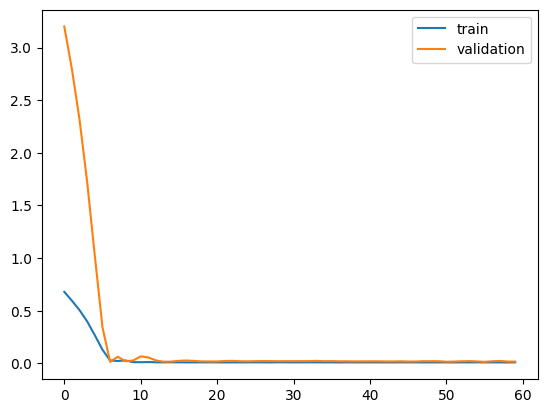

In [ ]:

plt.plot(finbert_LSTM_history.history['loss'], label='train')
plt.plot(finbert_LSTM_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

3/3 [==============================] - 2s 23ms/step
MSE:  19.383629764480066
MAE:  3.9316987050417627
R2:  -0.5185281484346016


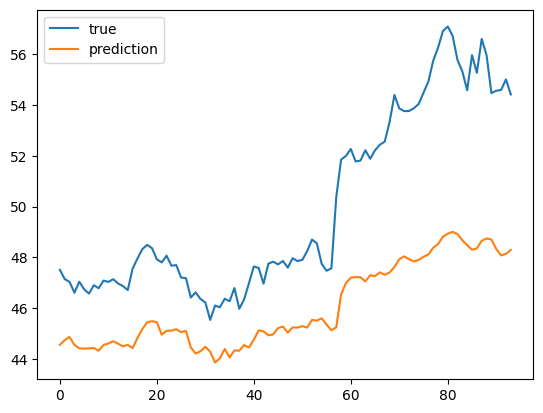

In [ ]:
y_pred_finbert_LSTM = finbert_LSTM_model.predict(X_finbert_test)
y_pred_finbert_LSTM = sc_y.inverse_transform(y_pred_finbert_LSTM)



print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_LSTM))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_LSTM))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_LSTM))
# print("AUC: ", accuracy_score(average(y_test_raw), average(y_pred_finbert_LSTM)))



plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_LSTM, label='prediction')
plt.legend()
plt.show()

# RNN Model #

In [ ]:
def train_model_rnn(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(layers.SimpleRNN(250, 
                          activation='tanh',
                          # kernal_initializer=tf.keras.initializers.GlorotNormal(),
                           input_shape=(X_train.shape[1], 1), return_sequences=True))
                        # input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.SimpleRNN(200, return_sequences=True,activation='tanh'))
    model.add(layers.Dropout(0.2))
    model.add(layers.SimpleRNN(150, return_sequences=True,activation='tanh'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False)
    return model, history

In [ ]:
adam_RNN = keras.optimizers.Adam(learning_rate=0.0001)
finbert_RNN_model, finbert_RNN_history = train_model_rnn(X_finbert_train, y_train,'mse', adam_RNN, 60, 128)


Epoch 1/60
6/6 [==============================] - 4s 138ms/step - loss: 0.4893 - val_loss: 0.4040
Epoch 2/60
6/6 [==============================] - 0s 53ms/step - loss: 0.2988 - val_loss: 0.1098
Epoch 3/60
6/6 [==============================] - 0s 43ms/step - loss: 0.2829 - val_loss: 0.0834
Epoch 4/60
6/6 [==============================] - 0s 44ms/step - loss: 0.2188 - val_loss: 0.0362
Epoch 5/60
6/6 [==============================] - 0s 42ms/step - loss: 0.2514 - val_loss: 0.0243
Epoch 6/60
6/6 [==============================] - 0s 46ms/step - loss: 0.1826 - val_loss: 0.0216
Epoch 7/60
6/6 [==============================] - 0s 42ms/step - loss: 0.2087 - val_loss: 0.0386
Epoch 8/60
6/6 [==============================] - 0s 44ms/step - loss: 0.2112 - val_loss: 0.0210
Epoch 9/60
6/6 [==============================] - 0s 42ms/step - loss: 0.1951 - val_loss: 0.0211
Epoch 10/60
6/6 [==============================] - 0s 41ms/step - loss: 0.1848 - val_loss: 0.0236
Epoch 11/60
6/6 [===========

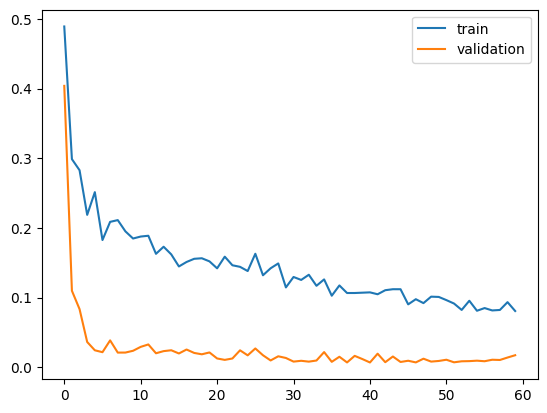

In [ ]:
plt.plot(finbert_RNN_history.history['loss'], label='train')
plt.plot(finbert_RNN_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

3/3 [==============================] - 0s 10ms/step
MSE:  17.143411902467253
MAE:  3.733339195309902
R2:  -0.3430277946089111


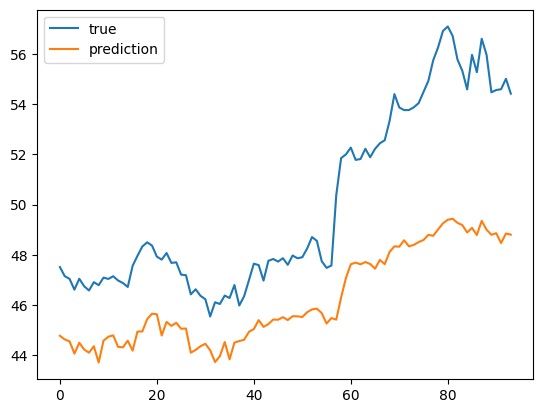

In [ ]:
y_pred_finbert_RNN = finbert_RNN_model.predict(X_finbert_test)
y_pred_finbert_RNN = sc_y.inverse_transform(y_pred_finbert_RNN)



print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_RNN))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_RNN))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_RNN))

plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_RNN, label='prediction')
plt.legend()
plt.show()

# GRU Model #

In [ ]:
def train_model_gru(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(GRU(250, 
                          activation='tanh',
                          input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(0.4))
    model.add(GRU(200, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(150, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False,)
    return model, history

In [ ]:
adam_GRU = keras.optimizers.Adam(learning_rate=0.0001)
finbert_GRU_model, finbert_GRU_history = train_model_gru(X_finbert_train, y_train,'mse', adam_GRU, 60, 128)



Epoch 1/60
6/6 [==============================] - 7s 300ms/step - loss: 0.6708 - val_loss: 3.0049
Epoch 2/60
6/6 [==============================] - 1s 83ms/step - loss: 0.5348 - val_loss: 2.3603
Epoch 3/60
6/6 [==============================] - 1s 108ms/step - loss: 0.4129 - val_loss: 1.7296
Epoch 4/60
6/6 [==============================] - 1s 86ms/step - loss: 0.2984 - val_loss: 1.1071
Epoch 5/60
6/6 [==============================] - 0s 83ms/step - loss: 0.1913 - val_loss: 0.5329
Epoch 6/60
6/6 [==============================] - 1s 84ms/step - loss: 0.1129 - val_loss: 0.1317
Epoch 7/60
6/6 [==============================] - 1s 85ms/step - loss: 0.0841 - val_loss: 0.0355
Epoch 8/60
6/6 [==============================] - 1s 94ms/step - loss: 0.1030 - val_loss: 0.0669
Epoch 9/60
6/6 [==============================] - 1s 85ms/step - loss: 0.1020 - val_loss: 0.0385
Epoch 10/60
6/6 [==============================] - 1s 87ms/step - loss: 0.0881 - val_loss: 0.0347
Epoch 11/60
6/6 [==========

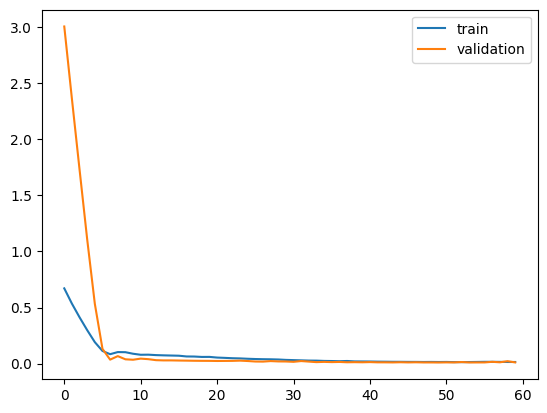

In [ ]:
plt.plot(finbert_GRU_history.history['loss'], label='train')
plt.plot(finbert_GRU_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

3/3 [==============================] - 1s 14ms/step
MSE:  5.0399292111568466
MAE:  1.8362605682191242
R2:  0.6051681513601818


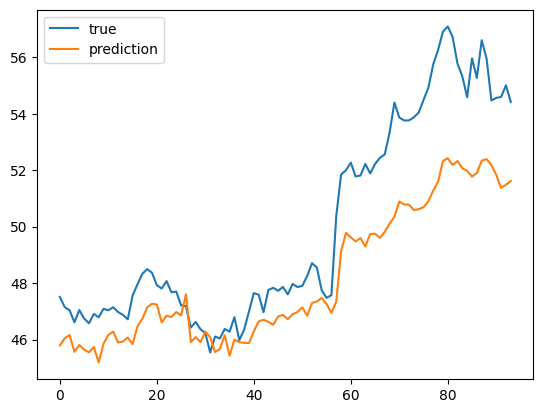

In [ ]:
y_pred_finbert_GRU = finbert_GRU_model.predict(X_finbert_test)
y_pred_finbert_GRU = sc_y.inverse_transform(y_pred_finbert_GRU)



print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_GRU))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_GRU))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_GRU))
# print("AUC: ", accuracy_score(y_test_raw, y_pred_finbert_GRU))
plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_GRU, label='prediction')
plt.legend()
plt.show()

# MLP Model #

In [ ]:
def train_model_mlp(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(Dense(250, 
                          activation='relu',
                          input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.4))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False)
    return model, history


In [ ]:

adam_MLP = keras.optimizers.Adam(learning_rate=0.0001)
finbert_MLP_model, finbert_MLP_history = train_model_mlp(X_finbert_train, y_train,'mse', adam_MLP, 60, 32)


Epoch 1/60
21/21 [==============================] - 1s 16ms/step - loss: 0.7525 - val_loss: 3.5901
Epoch 2/60
21/21 [==============================] - 0s 9ms/step - loss: 0.6081 - val_loss: 3.1908
Epoch 3/60
21/21 [==============================] - 0s 7ms/step - loss: 0.4830 - val_loss: 2.7733
Epoch 4/60
21/21 [==============================] - 0s 7ms/step - loss: 0.3615 - val_loss: 2.2733
Epoch 5/60
21/21 [==============================] - 0s 6ms/step - loss: 0.2418 - val_loss: 1.6869
Epoch 6/60
21/21 [==============================] - 0s 7ms/step - loss: 0.1470 - val_loss: 1.0642
Epoch 7/60
21/21 [==============================] - 0s 7ms/step - loss: 0.0678 - val_loss: 0.5194
Epoch 8/60
21/21 [==============================] - 0s 9ms/step - loss: 0.0356 - val_loss: 0.1876
Epoch 9/60
21/21 [==============================] - 0s 8ms/step - loss: 0.0228 - val_loss: 0.0542
Epoch 10/60
21/21 [==============================] - 0s 9ms/step - loss: 0.0220 - val_loss: 0.0233
Epoch 11/60
21/21 

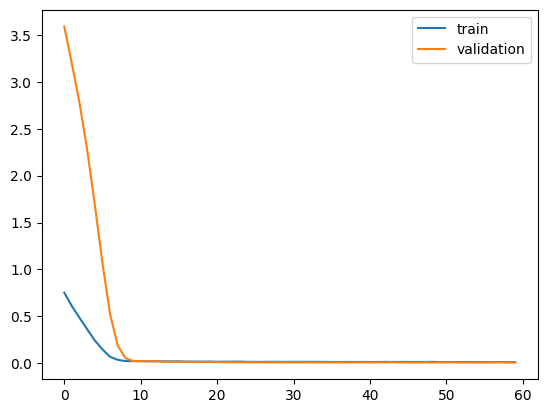

In [ ]:

plt.plot(finbert_MLP_history.history['loss'], label='train')
plt.plot(finbert_MLP_history.history['val_loss'], label='validation')
plt.legend()

In [ ]:

y_pred_finbert_MLP = finbert_MLP_model.predict(X_finbert_test)
y_pred_finbert_MLP = sc_y.inverse_transform(y_pred_finbert_MLP)



3/3 [==============================] - 0s 0s/step


MSE:  0.3770668653114664
MAE:  0.45138743113676083
R2:  0.9704602979021655


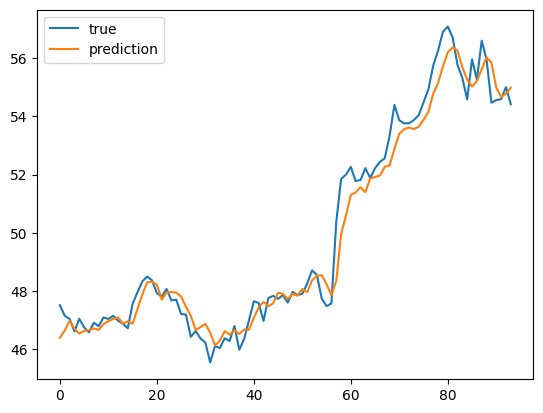

In [ ]:

print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_MLP))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_MLP))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_MLP))


plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_MLP, label='prediction')
plt.legend()
plt.show()



# Compare #

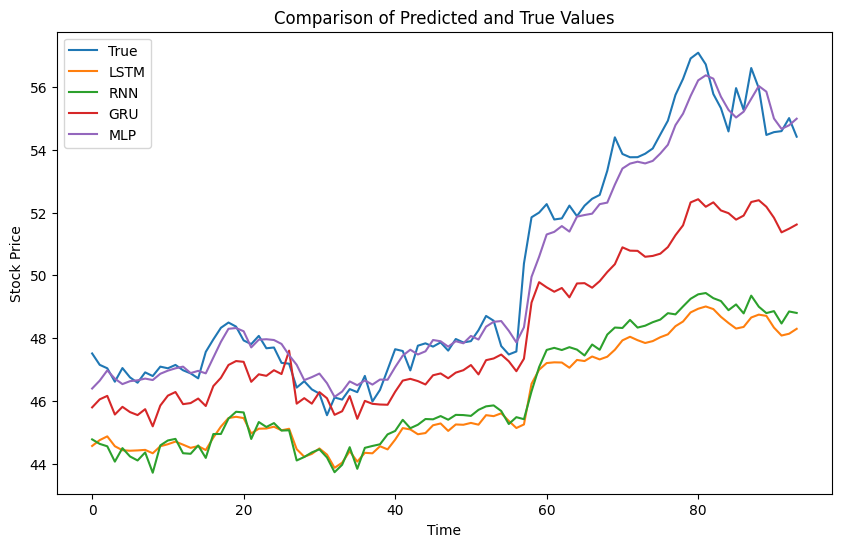

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))
# plt.figure(dpi=0)
# Plot true values
plt.plot(y_test_raw, label='True')

# Plot predicted values for each model
plt.plot(y_pred_finbert_LSTM, label='LSTM')
plt.plot(y_pred_finbert_RNN, label='RNN')
plt.plot(y_pred_finbert_GRU, label='GRU')
plt.plot(y_pred_finbert_MLP, label='MLP')

# Add title and axis labels
plt.title('Comparison of Predicted and True Values')
plt.xlabel('Time')
plt.ylabel('Stock Price')

# Add legend and show plot
plt.legend()
plt.show()


In [ ]:
models = ['LSTM', 'RNN', 'GRU', 'MLP']
preds = [y_pred_finbert_LSTM, y_pred_finbert_RNN,  y_pred_finbert_GRU, y_pred_finbert_MLP]

mae = []
mse = []
r2 = []

In [ ]:
from sklearn.metrics import mean_absolute_error
for x in range(0,len(models)):
    mae.append(mean_absolute_error(y_test_raw,preds[x]))
    mse.append(mean_squared_error(y_test_raw,preds[x]))
    r2.append(r2_score(y_test_raw,preds[x]))


In [ ]:
df = pd.DataFrame(list(zip(models, mae, mse, r2)),
               columns =['Model', 'Mean Absolute Error', 'Mean Squared Error', 'R2'])

df

,Model,Mean Absolute Error,Mean Squared Error,R2
0,LSTM,3.931699,19.383630,-0.518528
1,RNN,3.733339,17.143412,-0.343028
2,GRU,1.836261,5.039929,0.605168
3,MLP,0.451387,0.377067,0.970460


In [ ]:
df["Mean Absolute Error"]

0    3.931699
1    3.733339
2    1.836261
3    0.451387
Name: Mean Absolute Error, dtype: float64

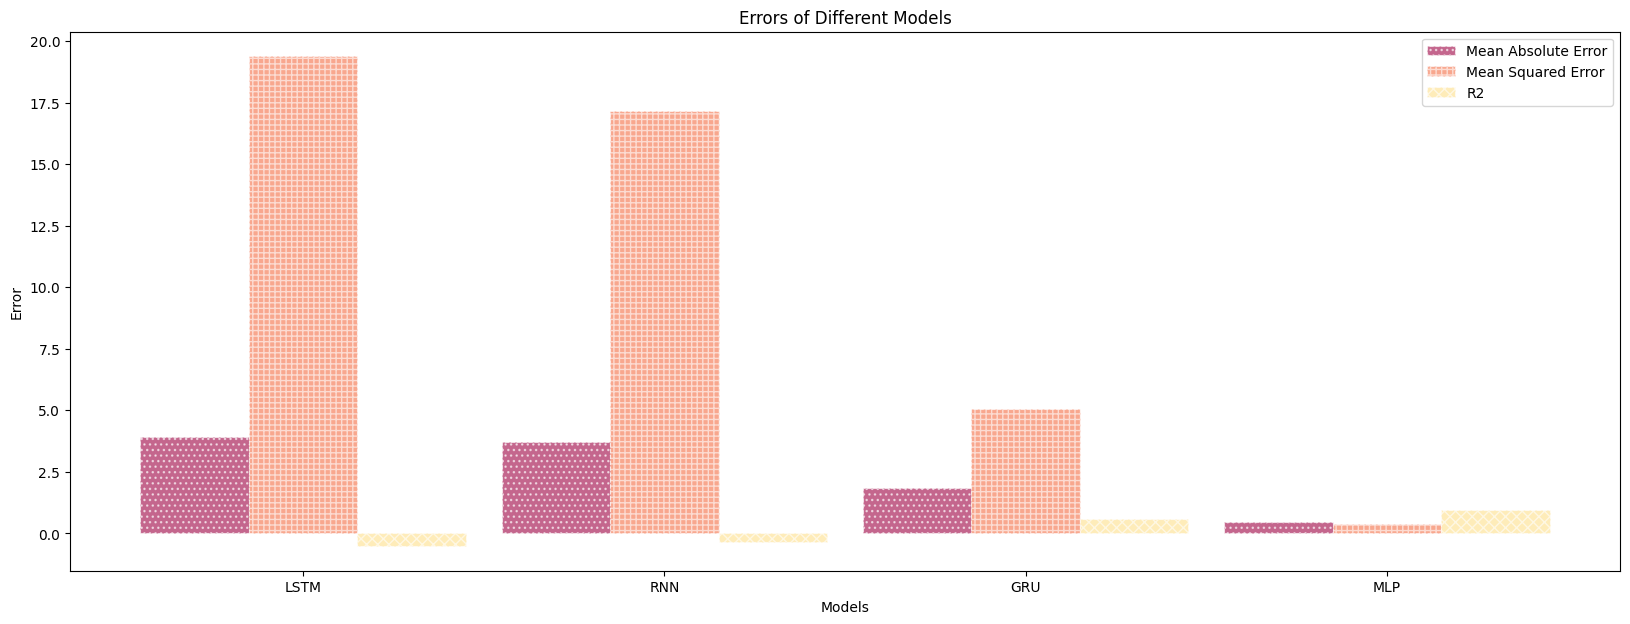

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (20, 7))
x = np.arange(4)
y1 = np.array(df['Mean Absolute Error'])
y2 = np.array(df['Mean Squared Error'])
y3 = np.array(df['R2'])
bar_width = 0.3

colors = [plt.cm.Spectral(i/float(5)) for i in range(5)]

plt.bar(x, y1, width=bar_width, color = colors[0], edgecolor = 'white',capsize=3, lw=.8, hatch='...',alpha=.6,linestyle='--')
plt.bar(x + bar_width, y2, tick_label =  df['Model'], width=bar_width, color = colors[1],edgecolor = 'white',capsize=3, lw=.8, hatch='+++',alpha=.6,linestyle='--')
plt.bar(x + 2 * bar_width, y3, width=bar_width,color = colors[2],edgecolor = 'white',capsize=3, lw=.8, hatch='xxx',alpha=.6,linestyle='--')
plt.xlabel("Models")
plt.ylabel("Error")
plt.title("Errors of Different Models")
plt.legend(["Mean Absolute Error", "Mean Squared Error", "R2"])
plt.show()

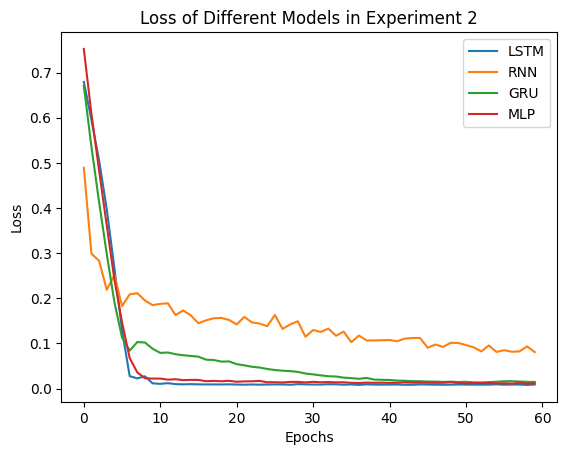

In [ ]:
#把所有的loss画在一起
plt.plot(finbert_LSTM_history.history['loss'], label='LSTM')
plt.plot(finbert_RNN_history.history['loss'], label='RNN')

plt.plot(finbert_GRU_history.history['loss'], label='GRU')

plt.plot(finbert_MLP_history.history['loss'], label='MLP')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss of Different Models in Experiment 2")
plt.legend()
plt.show()

In [ ]:
pickle.dump(finbert_LSTM_model, open(dir+"\\..\\models\\finbert_LSTM_model.pkl", "wb"))
pickle.dump(finbert_RNN_model, open(dir+"\\..\\models\\finbert_RNN_model.pkl", "wb"))
pickle.dump(finbert_GRU_model, open(dir+"\\..\\models\\finbert_GRU_model.pkl", "wb"))
pickle.dump(finbert_MLP_model, open(dir+"\\..\\models\\finbert_MLP_model.pkl", "wb"))
